In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [2]:
figures_path <- file.path("../figures/microscope_comparisons")
if (!dir.exists(figures_path)) {
  dir.create(figures_path, recursive = TRUE)
}

In [3]:
analysis_file_path = file.path(
    "../results/raw_image_quality_metrics/merged_results.parquet"
)
raw_image_quality_metrics <- arrow::read_parquet(analysis_file_path)
raw_image_quality_metrics <- as.data.frame(raw_image_quality_metrics)
# make the compartment a factor
raw_image_quality_metrics$compartment <- factor(
    raw_image_quality_metrics$compartment,
    levels = c("organoid", "nuclei", "cell")
)
# if CQ1 in patient then set microscope to CQ1
raw_image_quality_metrics$microscope <- ifelse(
    grepl("CQ1", raw_image_quality_metrics$patient),
    "CQ1", # set to CQ1 if CQ1 in patient
    "Echo" # else set to Echo
)
head(raw_image_quality_metrics)

,patient,well_fov,channel,compartment,signal_to_noise_ratio,michelson_contrast,RMS_contrast,well,WellRow,WellCol,well_position,treatment,dose,unit,microscope
,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
1,NF0037_T1,B10-1,405,cell,7.420109,1,1.6552919,B10,B,10,B10,Sapanisertib,1,uM,Echo
2,NF0037_T1,B10-1,405,nuclei,12.921635,1,2.4387569,B10,B,10,B10,Sapanisertib,1,uM,Echo
3,NF0037_T1,B10-1,405,organoid,5.460917,1,0.8283784,B10,B,10,B10,Sapanisertib,1,uM,Echo
4,NF0037_T1,B10-1,488,cell,4.372527,1,3.5202878,B10,B,10,B10,Sapanisertib,1,uM,Echo
5,NF0037_T1,B10-1,488,nuclei,5.143565,1,2.4226894,B10,B,10,B10,Sapanisertib,1,uM,Echo
6,NF0037_T1,B10-1,488,organoid,5.659672,1,3.5639354,B10,B,10,B10,Sapanisertib,1,uM,Echo


## Singal to noise ratio plots

Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”


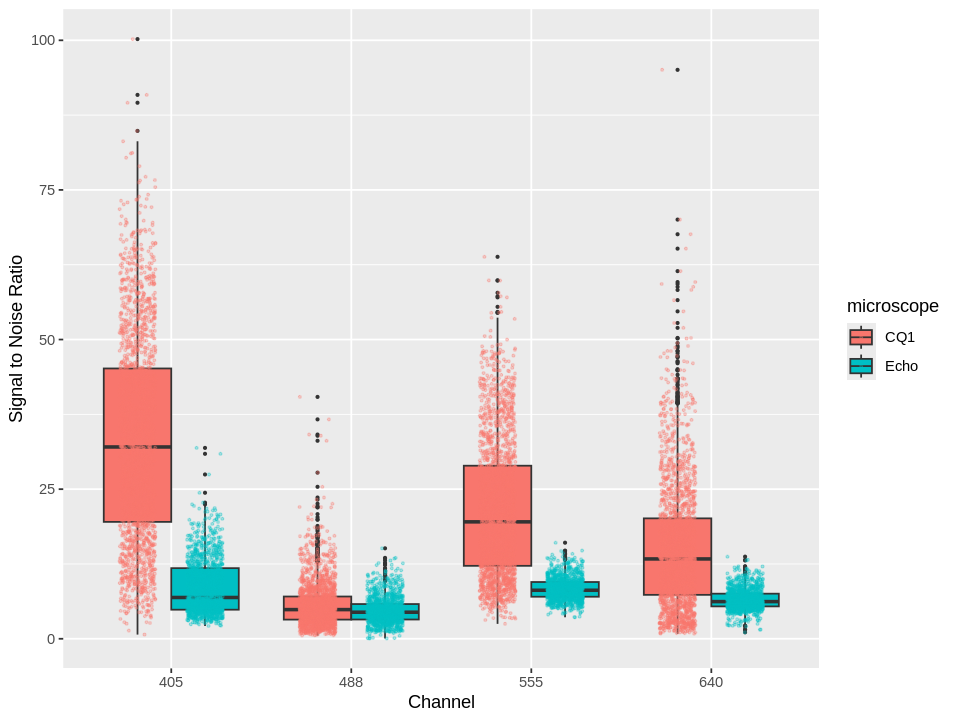

In [4]:
height <- 6
width <- 8
options(repr.plot.width = width, repr.plot.height = height)
s_n_ratio_plot <- (
    ggplot(
        data = raw_image_quality_metrics,
        aes(
            x = channel,
            y = signal_to_noise_ratio,
            fill = microscope   
    )
    )
    + geom_boxplot(
        # add jitter and transparency to see all points
        outlier.size = 0.5,
        position = position_dodge(width = 0.75)
    )
    + geom_jitter(
        aes(
            color = microscope
        ),
        position = position_jitterdodge(
            jitter.width = 0.2,
            dodge.width = 0.75
        ),
        alpha = 0.3,
        size = 0.5
    )
    + labs(
        x = "Channel",
        y = "Signal to Noise Ratio"
    )
)
ggsave(
    filename = file.path(
        figures_path,
        "signal_to_noise_ratio_by_microscope_and_channel.png"
    ),
    plot = s_n_ratio_plot,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
s_n_ratio_plot

Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”


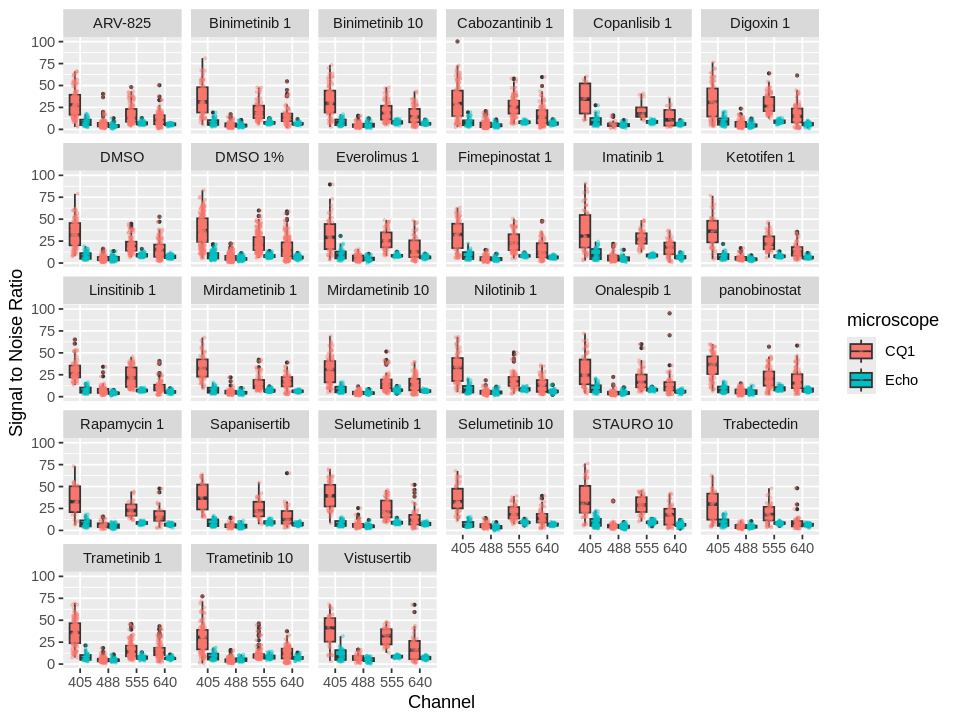

In [5]:
height <- 6
width <- 8
options(repr.plot.width = width, repr.plot.height = height)
s_n_ratio_facet_plot <- (
    ggplot(
        data = raw_image_quality_metrics,
        aes(
            x = channel,
            y = signal_to_noise_ratio,
            fill = microscope   
    )
    )
    + geom_boxplot(
        # add jitter and transparency to see all points
        outlier.size = 0.5,
        position = position_dodge(width = 0.75)
    )
    + geom_jitter(
        aes(
            color = microscope
        ),
        position = position_jitterdodge(
            jitter.width = 0.2,
            dodge.width = 0.75
        ),
        alpha = 0.3,
        size = 0.5
    )
    + labs(
        x = "Channel",
        y = "Signal to Noise Ratio"
    )
    + facet_wrap(. ~ treatment)
)

ggsave(
    filename = file.path(
        figures_path,
        "signal_to_noise_ratio_by_microscope_and_channel_facet_treatment.png"
    ),
    plot = s_n_ratio_facet_plot,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
s_n_ratio_facet_plot

## Michelson contrast plots

Warning message:
“Removed 207 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 207 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 207 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 207 rows containing missing values or values outside the scale range
(`geom_point()`).”


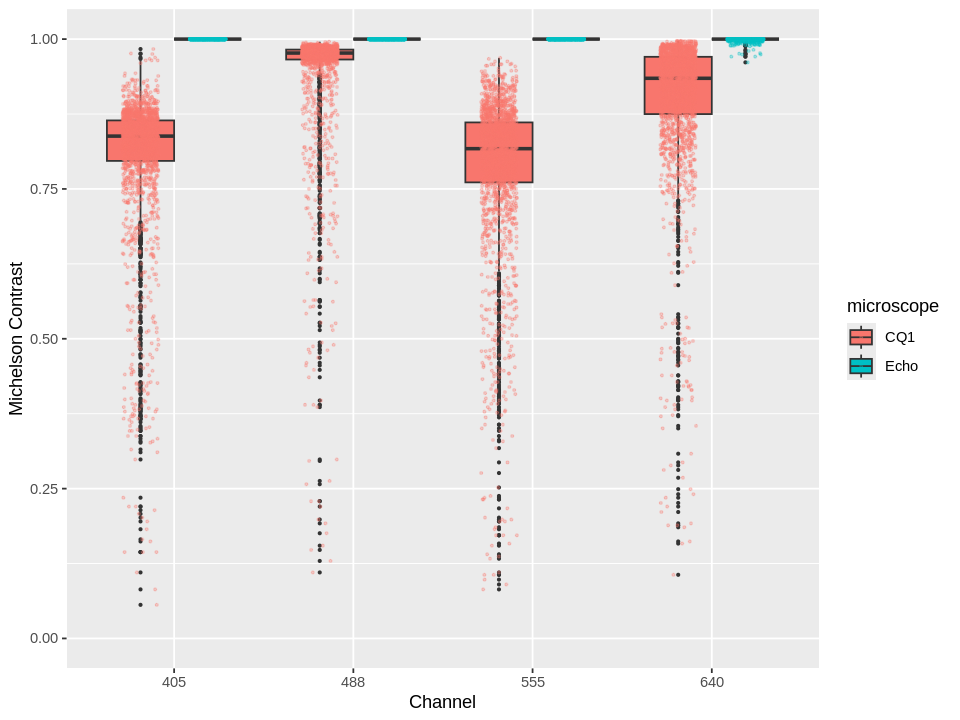

In [6]:
height <- 6
width <- 8
options(repr.plot.width = width, repr.plot.height = height)
michelson_contrast_plot <- (
    ggplot(
        data = raw_image_quality_metrics,
        aes(
            x = channel,
            y = michelson_contrast,
            fill = microscope   
    )
    )
    + geom_boxplot(
        # add jitter and transparency to see all points
        outlier.size = 0.5,
        position = position_dodge(width = 0.75)
    )
    + geom_jitter(
        aes(
            color = microscope
        ),
        position = position_jitterdodge(
            jitter.width = 0.2,
            dodge.width = 0.75
        ),
        alpha = 0.3,
        size = 0.5
    )
    + labs(
        x = "Channel",
        y = "Michelson Contrast"
    )
    + ylim(0,1)
)
ggsave(
    filename = file.path(
        figures_path,
        "michelson_contrast_by_microscope_and_channel.png"
    ),
    plot = michelson_contrast_plot,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
michelson_contrast_plot

Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”


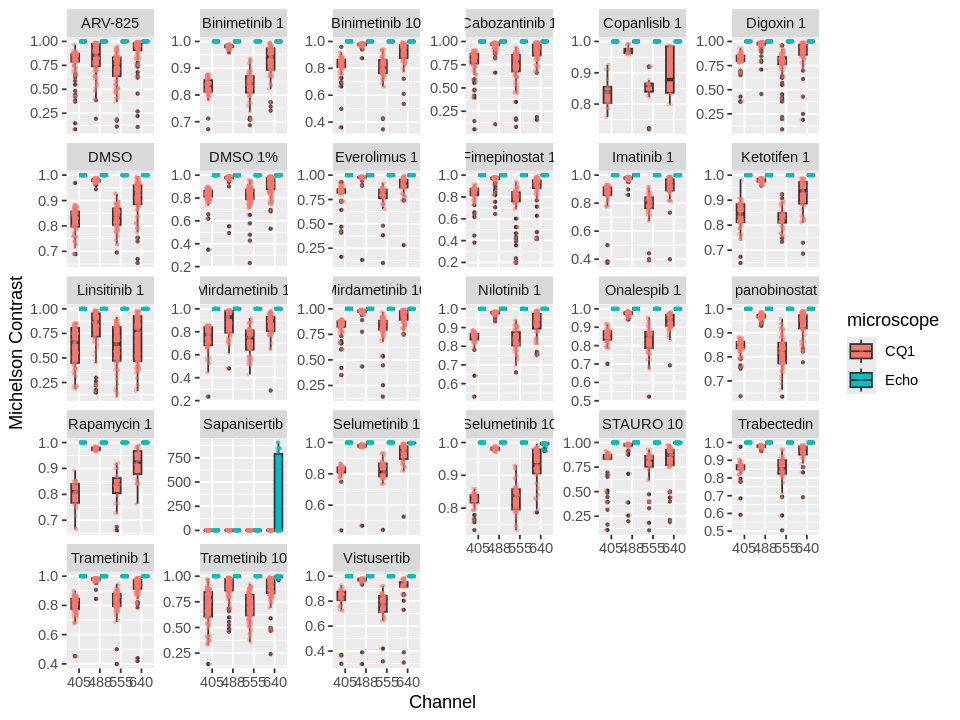

In [7]:
height <- 6
width <- 8
options(repr.plot.width = width, repr.plot.height = height)
michelson_contrast_facet_plot <- (
    ggplot(
        data = raw_image_quality_metrics,
        aes(
            x = channel,
            y = michelson_contrast,
            fill = microscope   
    )
    )
    + geom_boxplot(
        # add jitter and transparency to see all points
        outlier.size = 0.5,
        position = position_dodge(width = 0.75)
    )
    + geom_jitter(
        aes(
            color = microscope
        ),
        position = position_jitterdodge(
            jitter.width = 0.2,
            dodge.width = 0.75
        ),
        alpha = 0.3,
        size = 0.5
    )
    + labs(
        x = "Channel",
        y = "Michelson Contrast"
    )
    + facet_wrap(. ~ treatment, scales = "free_y")
)
ggsave(
    filename = file.path(
        figures_path,
        "michelson_contrast_by_microscope_and_channel_facet_treatment.png"
    ),
    plot = michelson_contrast_facet_plot,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
michelson_contrast_facet_plot

## RMS contrast plots

Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”


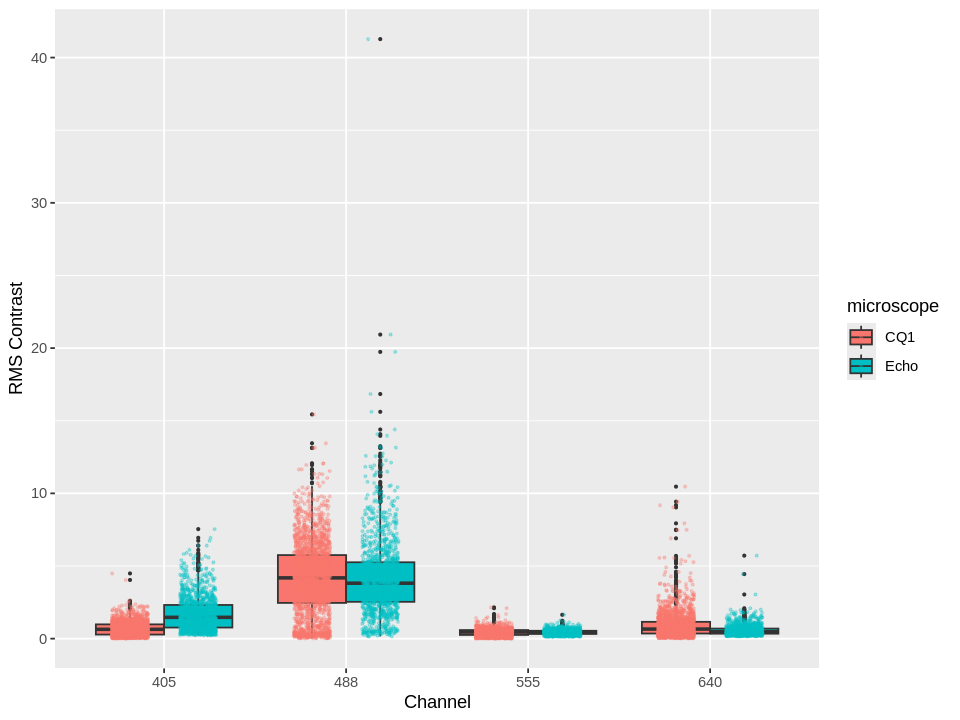

In [8]:
height <- 6
width <- 8
options(repr.plot.width = width, repr.plot.height = height)
RMS_contrast_plot <- (
    ggplot(
        data = raw_image_quality_metrics,
        aes(
            x = channel,
            y = RMS_contrast,
            fill = microscope   
    )
    )
    + geom_boxplot(
        # add jitter and transparency to see all points
        outlier.size = 0.5,
        position = position_dodge(width = 0.75)
    )
    + geom_jitter(
        aes(
            color = microscope
        ),
        position = position_jitterdodge(
            jitter.width = 0.2,
            dodge.width = 0.75
        ),
        alpha = 0.3,
        size = 0.5
    )
    + labs(
        x = "Channel",
        y = "RMS Contrast"
    )
)
ggsave(
    filename = file.path(
        figures_path,
        "RMS_contrast_by_microscope_and_channel.png"
    ),
    plot = RMS_contrast_plot,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
RMS_contrast_plot

Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 192 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 192 rows containing missing values or values outside the scale range
(`geom_point()`).”


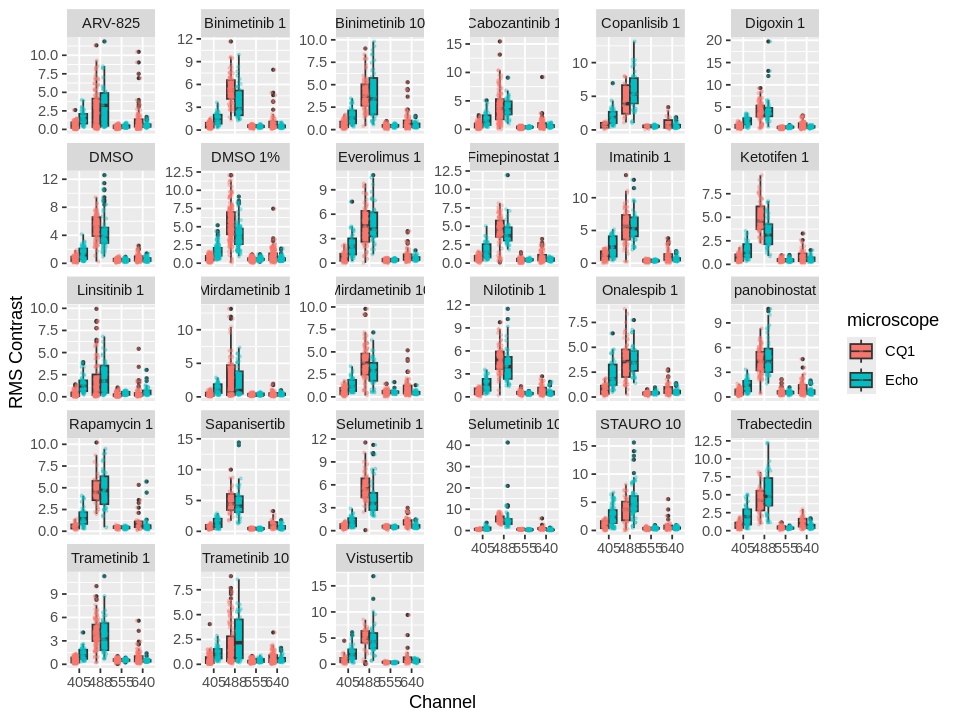

In [9]:
height <- 6
width <- 8
options(repr.plot.width = width, repr.plot.height = height)
RMS_contrast_facet_plot <- (
    ggplot(
        data = raw_image_quality_metrics,
        aes(
            x = channel,
            y = RMS_contrast,
            fill = microscope   
    )
    )
    + geom_boxplot(
        # add jitter and transparency to see all points
        outlier.size = 0.5,
        position = position_dodge(width = 0.75)
    )
    + geom_jitter(
        aes(
            color = microscope
        ),
        position = position_jitterdodge(
            jitter.width = 0.2,
            dodge.width = 0.75
        ),
        alpha = 0.3,
        size = 0.5
    )
    + labs(
        x = "Channel",
        y = "RMS Contrast"
    )
    + facet_wrap(. ~ treatment, scales = "free_y")
)
ggsave(
    filename = file.path(
        figures_path,
        "RMS_contrast_by_microscope_and_channel_facet_treatment.png"
    ),
    plot = RMS_contrast_facet_plot,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
RMS_contrast_facet_plot